In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [3]:
base_path='/kaggle/input/alpha-gestures/gestures/'
print(os.listdir(base_path))

['6', '4', '9', '17', '13', '2', '18', '8', '1', '20', '7', '21', '10', '12', '24', '5', '25', '16', '23', '0', '11', '19', '3', '15', '22', '14']


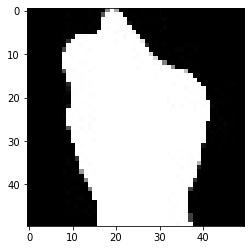

In [8]:
import matplotlib.pyplot as plt
im=load_img(base_path+'19/3.jpg')
plt.imshow(im)
plt.show()

In [81]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.1,
                             rescale=1./255,
                            rotation_range=20,
                            width_shift_range=.1,
                            height_shift_range=.1,
                             horizontal_flip=True,
                            fill_mode='nearest')
batch_size=256
pic_size=50
train_generator = datagen.flow_from_directory(
    base_path, 
    subset='training',
    target_size=(pic_size,pic_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    base_path,
    subset='validation',
    target_size=(pic_size,pic_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 56160 images belonging to 26 classes.
Found 6240 images belonging to 26 classes.


In [82]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 26

# Initialising the CNN
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=(50,50, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr= 0.00146 )
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 49, 49, 16)        80        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 23, 23, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 64)          51264     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)              

In [83]:
epochs = 5

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = val_generator,
                                validation_steps = val_generator.n//val_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/5
219/219 [==============================] - 60s 274ms/step - loss: 1.0684 - accuracy: 0.6430 - val_loss: 0.2755 - val_accuracy: 0.9250

Epoch 00001: val_accuracy improved from -inf to 0.92497, saving model to model_weights.h5
Epoch 2/5
219/219 [==============================] - 61s 277ms/step - loss: 0.1853 - accuracy: 0.9381 - val_loss: 0.1113 - val_accuracy: 0.9644

Epoch 00002: val_accuracy improved from 0.92497 to 0.96441, saving model to model_weights.h5
Epoch 3/5
219/219 [==============================] - 62s 282ms/step - loss: 0.0843 - accuracy: 0.9723 - val_loss: 0.0464 - val_accuracy: 0.9846

Epoch 00003: val_accuracy improved from 0.96441 to 0.98463, saving model to model_weights.h5
Epoch 4/5
219/219 [==============================] - 60s 273ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0294 - val_accuracy: 0.9863

Epoch 00004: val_accuracy improved from 0.98463 to 0.98630, saving model to model_weights.h5
Epoch 5/5
219/219 [==============================] 

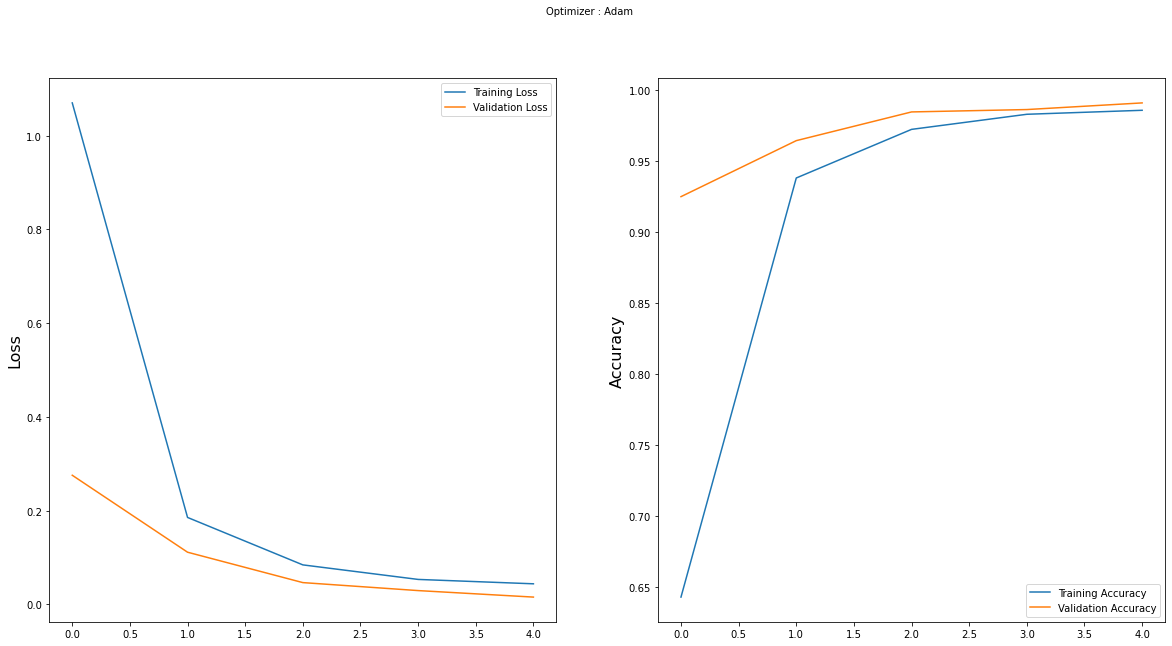

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [35]:
base_path2='/kaggle/input/testing0/'

In [85]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [57]:
class_names = val_generator.class_indices.keys()
print(class_names)
classes=['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '3', '4', '5', '6', '7', '8', '9']

dict_keys(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '3', '4', '5', '6', '7', '8', '9'])


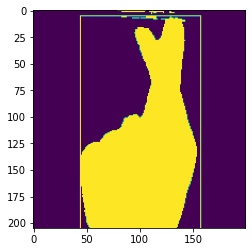

(50, 50)
17


In [87]:
import cv2
gray=cv2.imread(base_path2+'23.jpg',0)
plt.imshow(gray)
gray=cv2.resize(gray,(50,50), interpolation = cv2.INTER_AREA)
plt.show()
print(gray.shape)
pred=model.predict(gray.reshape(1,50,50,1))
print(classes[pred.argmax()])

## 

In [100]:
predictions = model.predict_generator(generator=val_generator)

[4922 1863  257   17 2051 1709  328   71   19  157 2333 4285   41 1641
 1535 4794   21  276 2883 1211 1551 5701   69   38 1667   63]


In [101]:
print(np.argmax(predictions,axis=1))

[12 19 22 ...  0  9 17]


IndentationError: expected an indented block (<ipython-input-96-8f76daa8836e>, line 10)